<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Prepare-the-dataset" data-toc-modified-id="Prepare-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare the dataset</a></span></li></ul></div>

# Load libraries

In [26]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare the dataset

In [27]:
import pickle

data_dir = "./data/"
with open(data_dir + "speaker_audio_segments_dict.pkl", 'rb') as f:
    student_audio_segments_dict = pickle.load(f)

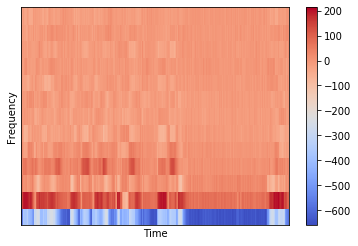

In [32]:
FRAME_SIZE = 512
HOP_LENGTH = 256

def extract_mfcc(sample):
    MFCCs = librosa.feature.mfcc(sample, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, n_mfcc=13)
    return MFCCs.T

sample = np.load(data_dir + "waveform/18020050_NguyenMinhTan/07/0.npy")
mfccs = extract_mfcc(sample)
librosa.display.specshow(mfccs.T, sr=DEFAULT_SAMPLING_RATE, hop_length=HOP_LENGTH)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()

In [28]:
audio_pairs_df = pd.read_csv(data_dir + "audio_sentence_pairs.csv")
audio_pairs_df

,student_I_id,article_I_id,sentence_I_id,student_II_id,article_II_id,sentence_II_id
0,17021214_TranVanCuong,0,1,17021218_DoanDinhDung,0,1
1,17021214_TranVanCuong,0,2,17021219_HaAnhDung,0,2
2,17021214_TranVanCuong,0,3,17021220_HoangNgocDung,0,3
3,17021214_TranVanCuong,0,4,17021229_VuTrongDuong,0,4
4,17021214_TranVanCuong,0,5,17021242_PhamTuanHiep,0,5
...,...,...,...,...,...,...
6927,18021346_LocPhiTruong,1,24,18021346_LocPhiTruong,1,25
6928,18021346_LocPhiTruong,1,22,18021346_LocPhiTruong,1,23
6929,18021346_LocPhiTruong,1,20,18021346_LocPhiTruong,1,21
6930,18021346_LocPhiTruong,1,18,18021346_LocPhiTruong,1,19


In [30]:
import _pickle as cPickle

waveform_dir = data_dir + "waveform/"
data_mfcc = {
    "sentence_I": [],
    "sentence_II": [],
    "same_speaker": []
}

audio_pairs = audio_pairs_df.to_numpy()
print('Progress: ', end='')
for i in range(len(audio_pairs)):
    row = audio_pairs[i]
    student_I_id, article_I_id, sentence_I_id = row[0], row[1], row[2]
    student_II_id, article_II_id, sentence_II_id = row[3], row[4], row[5]
    audio_sentence_I = np.load(waveform_dir + student_I_id + "/{:02d}/".format(article_I_id + 1) + str(sentence_I_id) + ".npy")
    audio_sentence_II = np.load(waveform_dir + student_II_id + "/{:02d}/".format(article_II_id + 1) + str(sentence_II_id) + ".npy")
    
    mfccs_I = extract_mfcc(audio_sentence_I)
    mfccs_II = extract_mfcc(audio_sentence_II)
    data_mfcc['sentence_I'].append(mfccs_I)
    data_mfcc['sentence_II'].append(mfccs_II)
    data_mfcc['same_speaker'].append(student_I_id == student_II_id)
    print('|', end='')
    
cPickle.dump(data_mfcc, open(data_dir + "data_mfcc.pkl", 'wb'), protocol=2)